In [47]:
from cpclasses import *
from importlib import reload

import GraphNeuralNetworks
reload(GraphNeuralNetworks)
from GraphNeuralNetworks import *

## TO DO:

Gør så hver node opdaterer sin farve baseret på værdi noden.

In [48]:
x = torch.tensor([[0], [3], [6], [4], [3]], dtype=torch.float)
edge_index = np.array([[0, 3],
                       [0, 4],
                       [1, 2],
                       [1, 3],
                       [2, 1],
                       [3, 1],
                       [3, 4],
                       [3, 0],
                       [4, 0],
                       [4, 3]])
edge_index = torch.tensor(edge_index.T, dtype=torch.long)


pos = torch.tensor([[5, 0], [3, 3], [0, 4], [4, 1.5], [6, 3.5]], dtype=torch.float)

graph = Data(x=x, edge_index=edge_index, pos=pos)

print(graph.pos)

tensor([[5.0000, 0.0000],
        [3.0000, 3.0000],
        [0.0000, 4.0000],
        [4.0000, 1.5000],
        [6.0000, 3.5000]])


In [49]:
pos = torch.rand(graph.num_nodes, 2)

print(pos)

torch.mean(pos, axis=0)

tensor([[0.9512, 0.2780],
        [0.4946, 0.7746],
        [0.0653, 0.7270],
        [0.4183, 0.8965],
        [0.0668, 0.3863]])


tensor([0.3992, 0.6125])

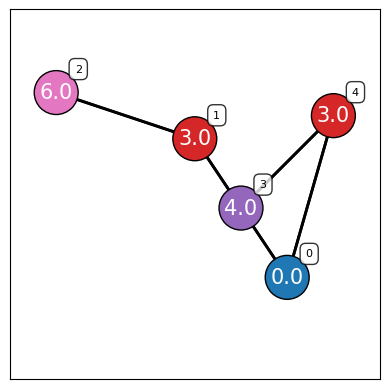

In [50]:
fig, ax = plt.subplots()

draw_graph(graph, ax)

In [51]:
class CustomMessagePassing(MessagePassing):

    def forward(self, x, edge_index):
        return self.propagate(edge_index, x=x)



In [52]:
gnn1_layer = CustomMessagePassing(aggr='add')
graph.x = gnn1_layer(graph.x, graph.edge_index)
print(gnn1_layer(graph.x, graph.edge_index))


tensor([[10.],
        [ 9.],
        [10.],
        [21.],
        [13.]])


In [53]:
x = torch.tensor([[0], [3], [6], [4], [3]], dtype=torch.float)
edge_index = np.array([[0, 3],
                       [0, 4],
                       [1, 2],
                       [1, 3],
                       [2, 1],
                       [3, 1],
                       [3, 4],
                       [3, 0],
                       [4, 0],
                       [4, 3],
                       [0, 0],
                       [1, 1],
                       [2, 2],
                       [3, 3],
                       [4, 4]])
edge_index = torch.tensor(edge_index.T, dtype=torch.long)


pos = torch.tensor([[5, 0], [3, 3], [0, 4], [4, 1.5], [6, 3.5]], dtype=torch.float)

graph = Data(x=x, edge_index=edge_index, pos=pos)

print(graph.pos)

tensor([[5.0000, 0.0000],
        [3.0000, 3.0000],
        [0.0000, 4.0000],
        [4.0000, 1.5000],
        [6.0000, 3.5000]])


In [54]:
pos = torch.rand(graph.num_nodes, 2)

print(pos)

torch.mean(pos, axis=0)

tensor([[0.4154, 0.9131],
        [0.6499, 0.2200],
        [0.9948, 0.2551],
        [0.4902, 0.6746],
        [0.1531, 0.6416]])


tensor([0.5407, 0.5409])

In [55]:
gnn1_layer = CustomMessagePassing(aggr='add')
graph.x = gnn1_layer(graph.x, graph.edge_index)
print(graph.x)
print(gnn1_layer(graph.x, graph.edge_index))


tensor([[ 7.],
        [13.],
        [ 9.],
        [10.],
        [ 7.]])
tensor([[24.],
        [32.],
        [22.],
        [37.],
        [24.]])


In [56]:
x = torch.tensor([[0], [3], [6], [4], [3]], dtype=torch.float)
edge_index = np.array([[0, 3],
                       [0, 4],
                       [1, 2],
                       [1, 3],
                       [2, 1],
                       [3, 1],
                       [3, 4],
                       [3, 0],
                       [4, 0],
                       [4, 3],
                       [0, 0],
                       [1, 1],
                       [2, 2],
                       [3, 3],
                       [4, 4]])
edge_index = torch.tensor(edge_index.T, dtype=torch.long)


pos = torch.tensor([[5, 0], [3, 3], [0, 4], [4, 1.5], [6, 3.5]], dtype=torch.float)

graph = Data(x=x, edge_index=edge_index, pos=pos)

print(graph.pos)

tensor([[5.0000, 0.0000],
        [3.0000, 3.0000],
        [0.0000, 4.0000],
        [4.0000, 1.5000],
        [6.0000, 3.5000]])


In [57]:
class CustomMessagePassing(MessagePassing):

    def forward(self, x, edge_index):
        return self.propagate(edge_index, x=x)

gnn_max_layer = CustomMessagePassing(aggr='max')

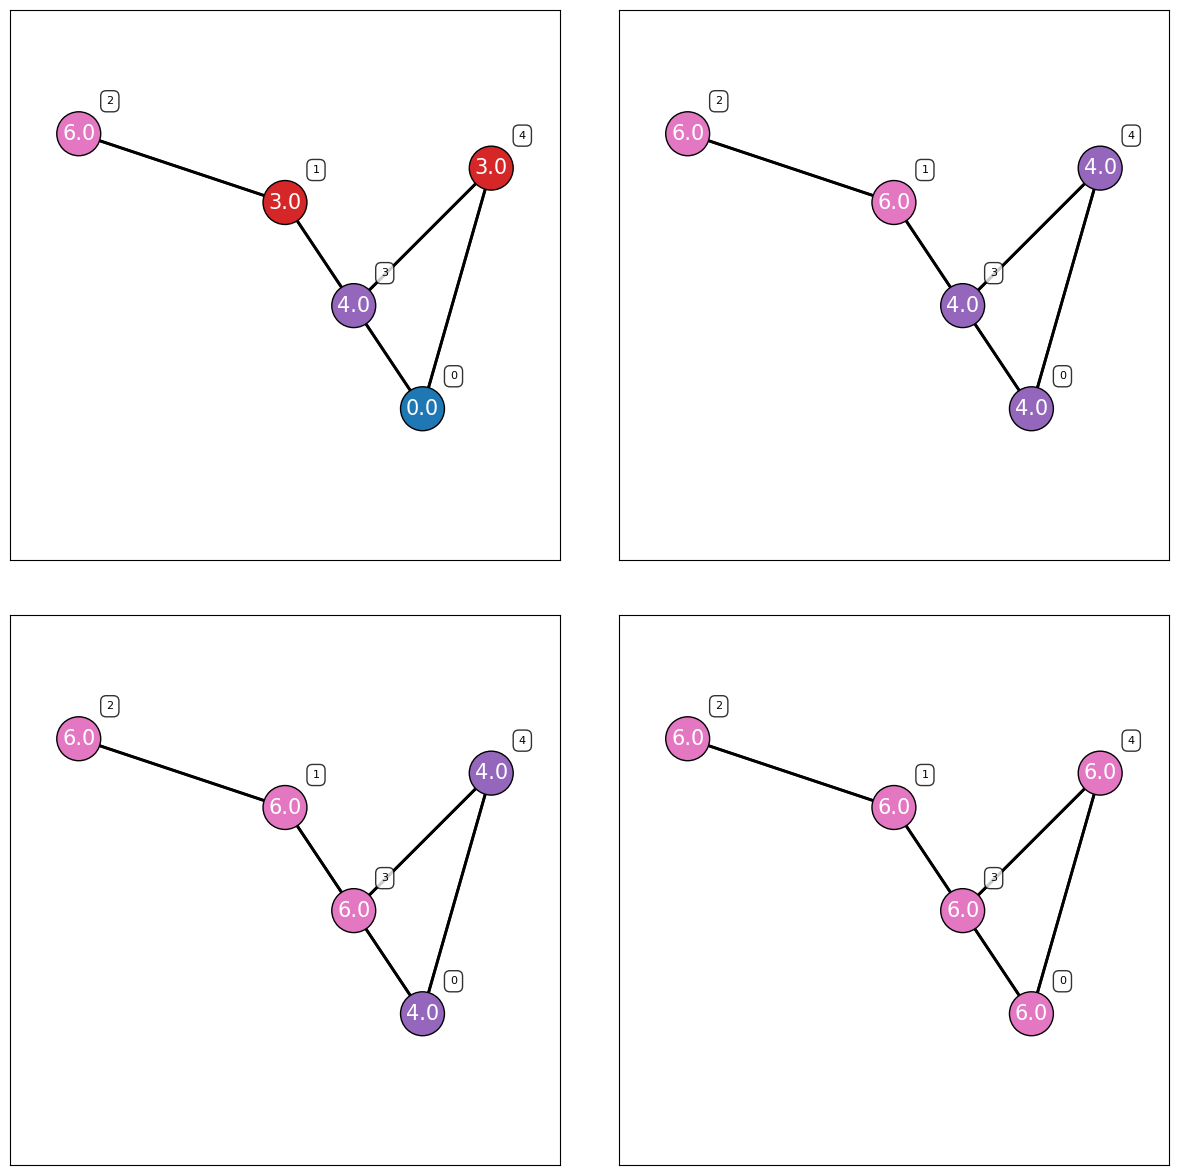

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

for ax in axs.flatten():
    draw_graph(graph, ax)
    graph.x = gnn_max_layer(graph.x, graph.edge_index)
    ax.set_aspect('equal')


In [59]:
large_graph = random_graph(100, cutoff=2.5, box_size = 25)

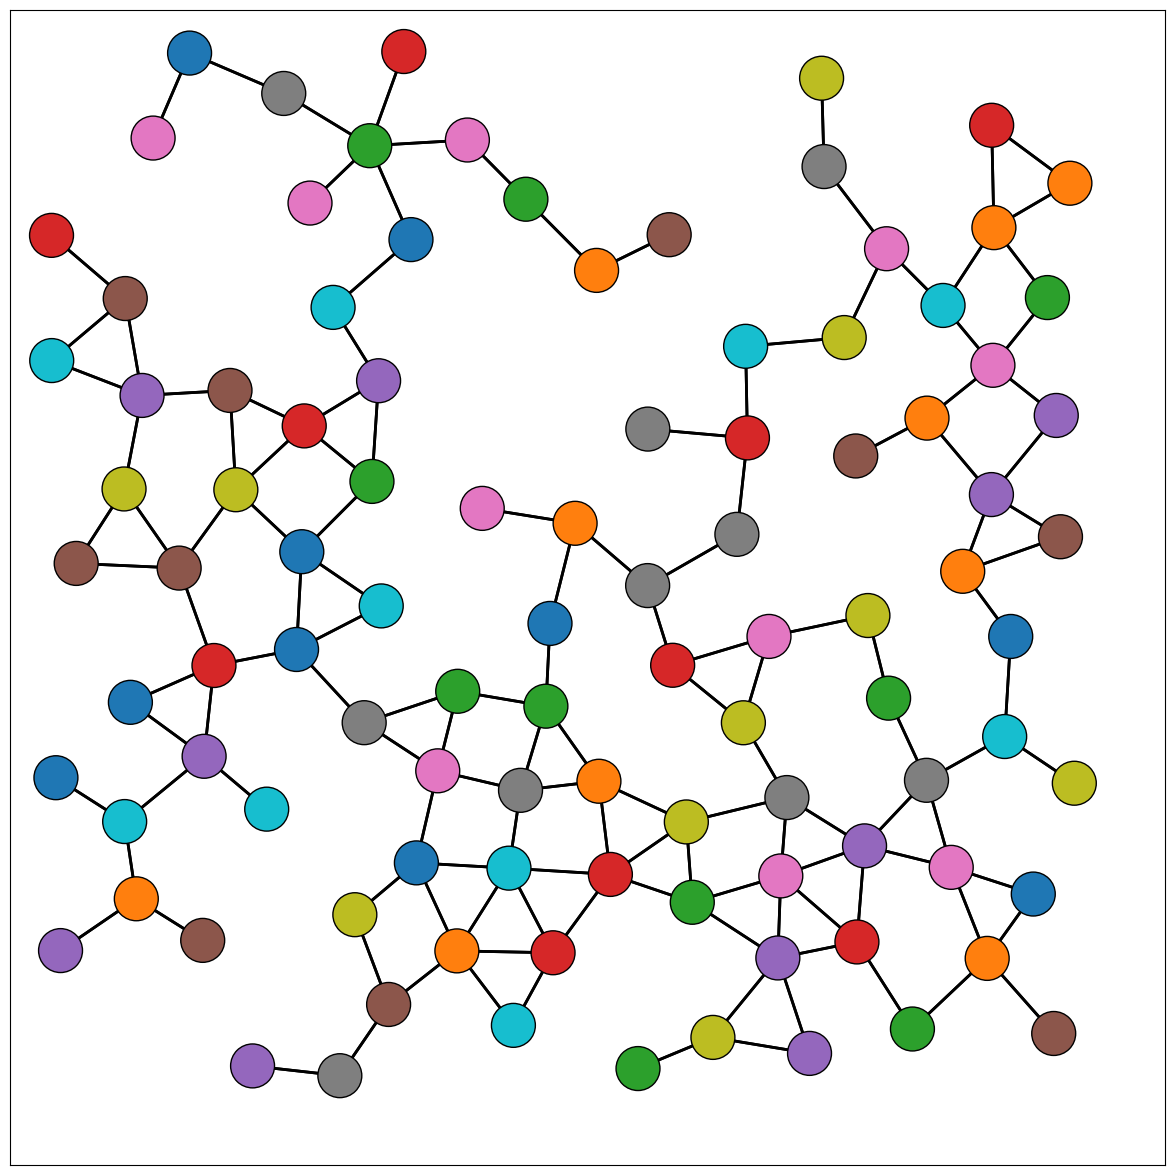

In [60]:


gnn_max_layer = CustomMessagePassing(aggr='max')

fig, ax= plt.subplots(figsize=(15, 15))

draw_graph(large_graph, ax, show_labels=False)
def update(i):
    ax.clear()
    draw_graph(large_graph, ax, show_labels=False)
    large_graph.x = gnn_max_layer(large_graph.x, large_graph.edge_index)
    ax.set_aspect('equal')






In [61]:
from matplotlib.animation import FuncAnimation
ani = FuncAnimation(fig, update, frames=range(15), repeat=False)
save_animation(ani, 'LargeGraphMaxPooling.gif', fps=3)